In [1]:
import numpy as n
import pandas as p
import seaborn as sns 
from numpy.random import randn
from pandas import Series,DataFrame
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import matplotlib as m
sns.set_style('whitegrid')
%matplotlib inline 
from sklearn.linear_model import LinearRegression
import sklearn

In [2]:
boston=load_boston()

In [3]:
print (boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dframe=DataFrame(boston.data)
dframe.columns=boston.feature_names
dframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
dframe['price']=boston.target

In [6]:
dframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#Single variable (no. of rooms) vs target value (price)

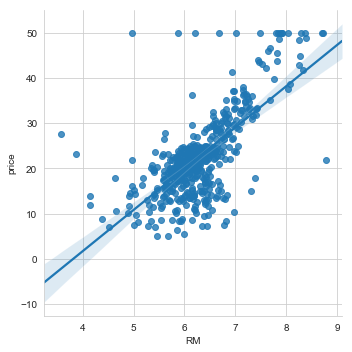

In [8]:
sns.lmplot('RM','price',data=dframe)

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

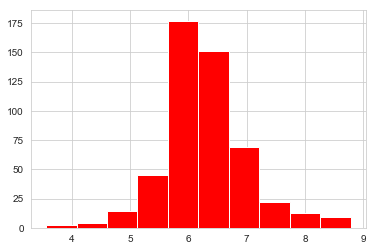

In [38]:
#histogram plot for no of rooms 
plt.hist(dframe.RM,bins=10,color='red')

In [9]:
#creating object for linear model

In [10]:
reg=LinearRegression()

In [11]:
X=dframe.drop("price",axis=1)
Y=dframe.price

In [12]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
print ("The estimated intercept cofficient is %.2f " %reg.intercept_)
print ("The number of cofficient used was %d" %len(reg.coef_))

The estimated intercept cofficient is 36.46 
The number of cofficient used was 13


In [14]:
coef_df=DataFrame(dframe.columns)
coef_df.columns=["Features"]
coef_df["coefficents_estimated"]=Series(reg.coef_)
coef_df

,Features,coefficents_estimated
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [15]:
#splitting data into train and test

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(dframe.drop("price",axis=1),dframe.price)

In [18]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
#prediction for train data

In [20]:
pred_train=reg.predict(x_train)

In [21]:
#now make prediction for test data

In [22]:
pred_test=reg.predict(x_test)

In [ ]:
#results

In [23]:
print ("RMS error for train data set %.2f" %n.mean((y_train-pred_train)**2))
print ("RMS error for test data set %.2f" %n.mean((y_test-pred_test)**2))

RMS error for train data set 22.59
RMS error for test data set 20.47


In [29]:
# Here we are getting high training set error which implies that the linear function we used is not fitted well i.e. high bias

In [24]:
# residual= observed value-predcited value

Text(0.5, 1.0, 'Residual plot')

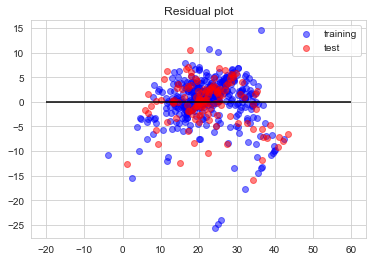

In [26]:
train =plt.scatter(pred_train,(pred_train-y_train),c='b',alpha=0.5)
test=plt.scatter(pred_test,(pred_test-y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-20,xmax=60)
plt.legend((train,test),("training","test"))
plt.title("Residual plot")

In [27]:
#so here we can see that we are not getting any pattern over there, residual values are randomly distributed